Let me start with installing pillow library in environment with created requirements.txt file.
I have created a directory named images which contains images for expirements

In [ ]:
pip install -r requirements.txt

Writting a small program which will show file paths as tree unix command to understand folder structure accurately

In [1]:
from pathlib import Path

class DisplayablePath(object):
    display_filename_prefix_middle = '├──'
    display_filename_prefix_last = '└──'
    display_parent_prefix_middle = '    '
    display_parent_prefix_last = '│   '

    def __init__(self, path, parent_path, is_last):
        self.path = Path(str(path))
        self.parent = parent_path
        self.is_last = is_last
        if self.parent:
            self.depth = self.parent.depth + 1
        else:
            self.depth = 0

    @property
    def displayname(self):
        if self.path.is_dir():
            return self.path.name + '/'
        return self.path.name

    @classmethod
    def make_tree(cls, root, parent=None, is_last=False, criteria=None):
        root = Path(str(root))
        criteria = criteria or cls._default_criteria

        displayable_root = cls(root, parent, is_last)
        yield displayable_root

        children = sorted(list(path
                               for path in root.iterdir()
                               if criteria(path)),
                          key=lambda s: str(s).lower())
        count = 1
        for path in children:
            is_last = count == len(children)
            if path.is_dir():
                yield from cls.make_tree(path,
                                         parent=displayable_root,
                                         is_last=is_last,
                                         criteria=criteria)
            else:
                yield cls(path, displayable_root, is_last)
            count += 1

    @classmethod
    def _default_criteria(cls, path):
        return True

    @property
    def displayname(self):
        if self.path.is_dir():
            return self.path.name + '/'
        return self.path.name

    def displayable(self):
        if self.parent is None:
            return self.displayname

        _filename_prefix = (self.display_filename_prefix_last
                            if self.is_last
                            else self.display_filename_prefix_middle)

        parts = ['{!s} {!s}'.format(_filename_prefix,
                                    self.displayname)]

        parent = self.parent
        while parent and parent.parent is not None:
            parts.append(self.display_parent_prefix_middle
                         if parent.is_last
                         else self.display_parent_prefix_last)
            parent = parent.parent

        return ''.join(reversed(parts))

Running class DisplayablePath with make_tree function - This function will take path as input to show nested tree structure of all folders and files available in given path

In [2]:
paths = DisplayablePath.make_tree(Path('.'))
for path in paths:
    print(path.displayable())

/
├── .ipynb_checkpoints/
│   ├── Pillow_experiments-checkpoint.ipynb
│   └── Untitled-checkpoint.ipynb
├── images/
│   └── cat.png
├── Pillow_experiments.ipynb
├── requirements.txt
└── Untitled.ipynb


Ignore all folders with . prefix as these are hidden files generated by OS and jupyter notebook

In [7]:
# Let me start with importing Pillow library to book
from PIL import Image
pil_im = Image.open('images/cat.png')

To view images in jupyter notebook I would like to use matplotlib, May be couple of ways avaiable but matplotlib is one which I know

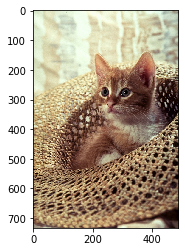

In [10]:
from matplotlib.pyplot import imshow
import numpy as np
imshow(np.asarray(pil_im))

I would like to convert this image in Grayscale and check result 

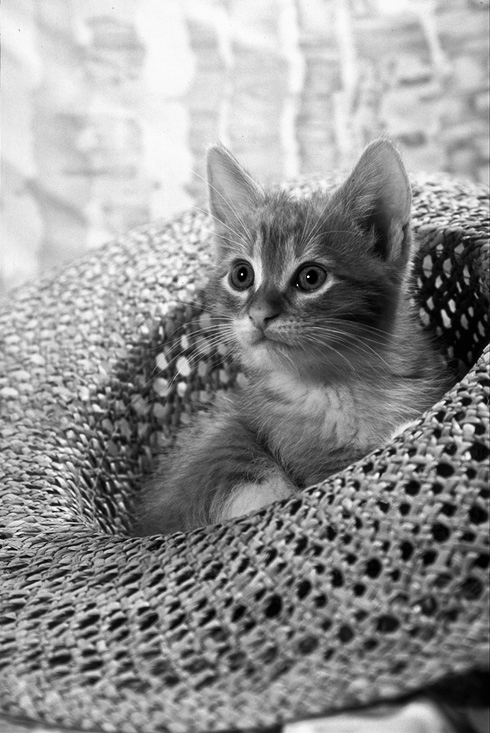

In [13]:
pil_im.convert('L')

Using the save() method, PIL can save images in most image file formats. Here’s an example that takes all image files in a list of filenames (filelist ) and converts the images to JPEG files.

In [16]:
import os
infile = "images/cat.png"
outfile = os.path.splitext(infile)[0] + ".jpg"
if infile != outfile:
    try:
        Image.open(infile).save(outfile)
    except IOError:
        print("cannot convert", infile)

In [17]:
paths = DisplayablePath.make_tree(Path('.'))
for path in paths:
    print(path.displayable())

/
├── .ipynb_checkpoints/
│   ├── Pillow_experiments-checkpoint.ipynb
│   └── Untitled-checkpoint.ipynb
├── images/
│   ├── cat.jpg
│   └── cat.png
├── Pillow_experiments.ipynb
├── requirements.txt
└── Untitled.ipynb
